In [49]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [34]:
# load dataset
try:
    dataset_url = 'https://raw.githubusercontent.com/KevinAndT25/DIF62130_A_25_2311532005_KevinAndhika/refs/heads/main/Dataset/ObesityDataSet.csv'
    df = pd.read_csv(dataset_url, sep=',')
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_url}")
except Exception as e:
    print(f"An error occurred during data loading: {e}")

Dataset loaded successfully.


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [35]:
# Informasi dataset
print("Info dataset:")
print(df.info())
print("\nShape dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                 

In [36]:
# Encoding variabel target (NObeyesdad)
label_encoder = LabelEncoder()
df['NObeyesdad_encoded'] = label_encoder.fit_transform(df['NObeyesdad'])

# One-Hot Encoding untuk variabel kategorik
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                      'SMOKE', 'SCC', 'CALC', 'MTRANS']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Pisahkan features dan target
X = df_encoded.drop(['NObeyesdad', 'NObeyesdad_encoded'], axis=1)
y = df_encoded['NObeyesdad_encoded']

print("Shape setelah preprocessing:", X.shape)
print("Jumlah kelas target:", len(np.unique(y)))

Shape setelah preprocessing: (2111, 23)
Jumlah kelas target: 7


In [37]:
# Split data menjadi train dan test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Feature Scaling (Normalisasi 0-1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cek hasil preprocessing
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("\nShape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (1477, 23)
Shape X_test: (634, 23)

Shape y_train: (1477,)
Shape y_test: (634,)


In [38]:
# Parameter model
input_shape = X_train_scaled.shape[1]
num_classes = len(np.unique(y))

# Bangun model dengan 2 hidden layer
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_shape,)), # Hidden layer 1
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'), # Hidden layer 2
    layers.Dropout(0.2),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

# Tampilkan summary model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,783 (46.03 KB)

 Trainable params: 11,783 (46.03 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
# Training model
history = model.fit(
    X_train_scaled, y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    shuffle=True,
    verbose=1
)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.1639 - loss: 1.9442 - val_accuracy: 0.4155 - val_loss: 1.7745
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3651 - loss: 1.7504 - val_accuracy: 0.4730 - val_loss: 1.5100
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4408 - loss: 1.4988 - val_accuracy: 0.5507 - val_loss: 1.2701
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5104 - loss: 1.2866 - val_accuracy: 0.6622 - val_loss: 1.1172
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5512 - loss: 1.1872 - val_accuracy: 0.6723 - val_loss: 1.0160
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5743 - loss: 1.0780 - val_accuracy: 0.7095 - val_loss: 0.9358
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6175 - loss: 0.9676 - val_accuracy: 0.7399 - val_loss: 0.8698
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6390 - loss: 0.9350 - val_accuracy: 0.7466 - 

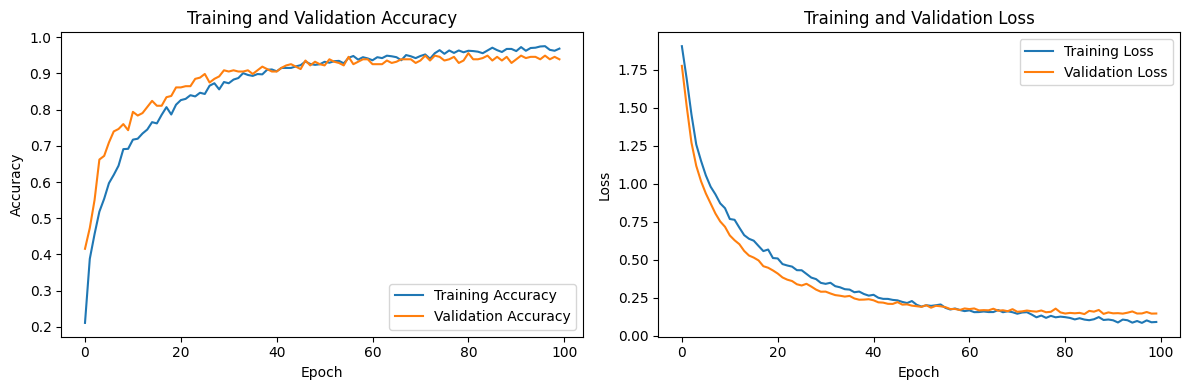

In [46]:
# Plot akurasi training dan validation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
# Prediksi pada data test
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

# Hitung metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n=== HASIL EVALUASI MODEL ===")
print(f"Akurasi: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

=== HASIL EVALUASI MODEL ===
Akurasi: 0.9180
F1-Score: 0.9186

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.91      0.93        82
      Normal_Weight       0.88      0.83      0.85        86
     Obesity_Type_I       0.95      0.95      0.95       106
    Obesity_Type_II       1.00      0.98      0.99        89
   Obesity_Type_III       1.00      0.99      0.99        97
 Overweight_Level_I       0.77      0.93      0.84        87
Overweight_Level_II       0.90      0.82      0.86        87

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.92      0.92      0.92       634



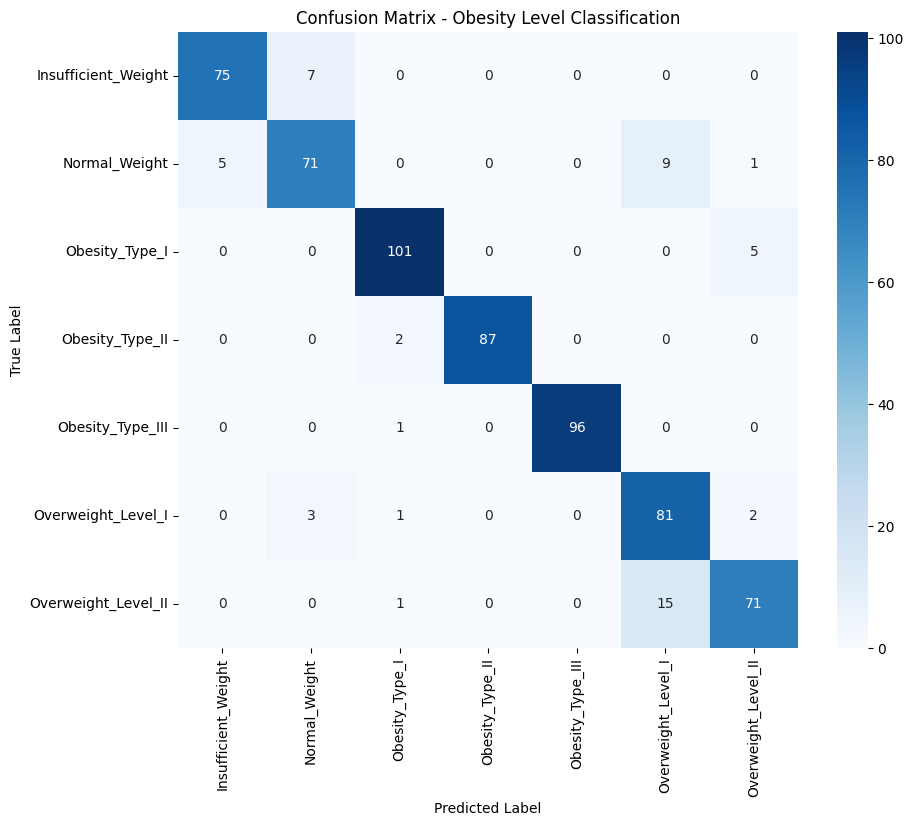

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Obesity Level Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
# Analisis performa model
print("=== ANALISIS KINERJA MODEL ===")

# 1. Akurasi overall
print(f"1. Akurasi model: {accuracy:.2%}")

# 2. F1-Score per kelas
f1_per_class = f1_score(y_test, y_pred, average=None)
print("\n2. F1-Score per kelas:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"   - {class_name}: {f1_per_class[i]:.4f}")

# 3. Identifikasi kelas dengan performa terburuk
worst_class_idx = np.argmin(f1_per_class)
print(f"\n3. Kelas dengan F1-Score terendah: {label_encoder.classes_[worst_class_idx]} ({f1_per_class[worst_class_idx]:.4f})")

# 4. Cek overfitting/underfitting
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
accuracy_gap = final_train_acc - final_val_acc

print(f"\n4. Analisis Overfitting/Underfitting:")
print(f"   - Training Accuracy: {final_train_acc:.4f}")
print(f"   - Validation Accuracy: {final_val_acc:.4f}")
print(f"   - Gap: {accuracy_gap:.4f}")

if accuracy_gap > 0.1:
    print("   → Terindikasi OVERFITTING")
elif accuracy_gap < 0.01:
    print("   → Terindikasi UNDERFITTING")
else:
    print("   → Model cukup seimbang")

=== ANALISIS KINERJA MODEL ===
1. Akurasi model: 91.80%

2. F1-Score per kelas:
   - Insufficient_Weight: 0.9259
   - Normal_Weight: 0.8503
   - Obesity_Type_I: 0.9528
   - Obesity_Type_II: 0.9886
   - Obesity_Type_III: 0.9948
   - Overweight_Level_I: 0.8438
   - Overweight_Level_II: 0.8554

3. Kelas dengan F1-Score terendah: Overweight_Level_I (0.8438)

4. Analisis Overfitting/Underfitting:
   - Training Accuracy: 0.9687
   - Validation Accuracy: 0.9392
   - Gap: 0.0295
   → Model cukup seimbang
